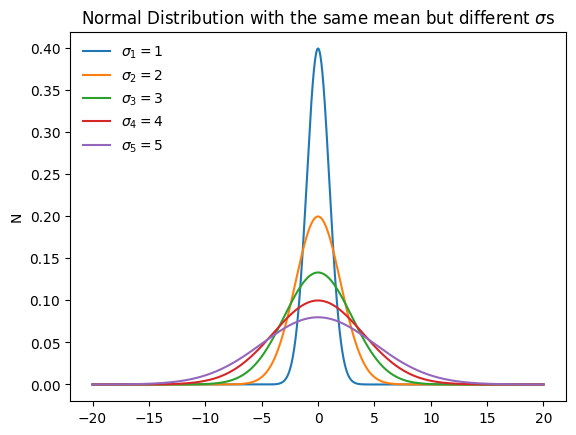

In [83]:


import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

## generate the data and plot it for an ideal normal curve

## x-axis for the plot [random numbers in -N to N range]
x_data = np.arange(-20, 20, 0.0001)

## y-axis as the gaussian  (https://scipy.github.io/devdocs/reference/generated/scipy.stats.norm.html)
y_data = stats.norm.pdf(x_data, 0, 1)

y1_data = stats.norm.pdf(x_data, 0, 2)
y2_data = stats.norm.pdf(x_data, 0, 3)
y3_data = stats.norm.pdf(x_data, 0, 4)
y4_data = stats.norm.pdf(x_data, 0, 5)

## plot data
plt.plot(x_data, y_data, label='$\sigma_{1}=1$')
plt.plot(x_data, y1_data, label='$\sigma_{2}=2$')
plt.plot(x_data, y2_data, label='$\sigma_{3}=3$')
plt.plot(x_data, y3_data, label='$\sigma_{4}=4$')
plt.plot(x_data, y4_data, label='$\sigma_{5}=5$')

#plt.xlabel("Gaussain variable")
plt.ylabel("N")
#plt.legend(["blue", "green"], loc="lower right")
plt.title("Normal Distribution with the same mean but different $\sigma$s")
plt.legend(loc='upper left', frameon=False)
plt.show()


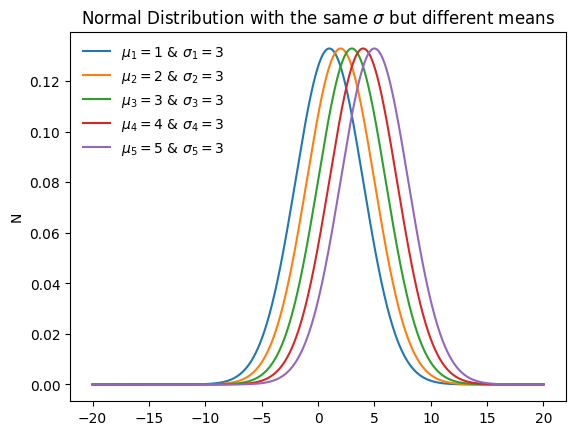

In [84]:
## y-axis as the gaussian
y_data = stats.norm.pdf(x_data, 1, 3)
y1_data = stats.norm.pdf(x_data, 2, 3)
y2_data = stats.norm.pdf(x_data, 3, 3)
y3_data = stats.norm.pdf(x_data, 4, 3)
y4_data = stats.norm.pdf(x_data, 5, 3)

## plot data
plt.plot(x_data, y_data, label='$\mu_{1} = 1~&~\sigma_{1}=3$')
plt.plot(x_data, y1_data, label='$\mu_{2} = 2~&~\sigma_{2}=3$')
plt.plot(x_data, y2_data, label='$\mu_{3} = 3~&~\sigma_{3}=3$')
plt.plot(x_data, y3_data, label='$\mu_{4} = 4~&~\sigma_{4}=3$')
plt.plot(x_data, y4_data, label='$\mu_{5} = 5~&~\sigma_{5}=3$')

#plt.xlabel("Gaussain variable")
plt.ylabel("N")
#plt.legend(["blue", "green"], loc="lower right")
plt.title("Normal Distribution with the same $\sigma$ but different means")
plt.legend(loc='upper left', frameon=False)
plt.show()

area = 0.9999974990131
mean = 4.968577891518782
std = 3.0323046127828652


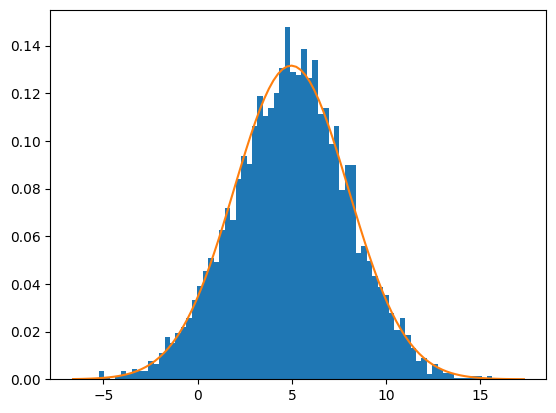

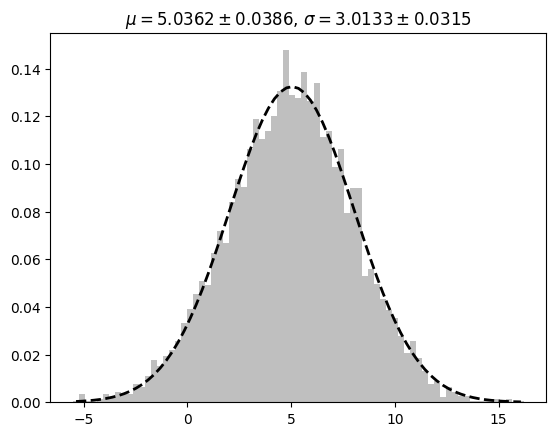

In [90]:

## trapz Integrate along the given axis using the composite trapezoidal rule (https://colab.research.google.com/drive/1zh9OGs7XDq-ZHM4zL9bK8gU0vyIPc3jU#scrollTo=MwDGM3GeSsni&line=1&uniqifier=1)
delta = (max(x_data) - min(x_data))/len(x_data)
area = np.trapz(y1_data, dx=delta)
print("area =", area)

#Draw random samples from a normal (Gaussian) distribution. (https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
data = np.random.normal(loc=5.0, scale=3.0, size=5000)
#norm.fit tries to fit the parameters of a normal distribution based on the data. And indeed in the example above mean is approximately loc and std is approximately scale
mean,std=norm.fit(data)
print("mean =", mean)
print("std =", std)
nbins = 75
plt.hist(data, nbins, density=True)


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

fig, ax = plt.subplots()

n, bins, patches = ax.hist(data,nbins, density=True, facecolor = 'grey', alpha = 0.5, label='before');

centers = (0.5*(bins[1:]+bins[:-1]))
#curve_fit(lambda
#pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), centers, n, p0=[0,1])
pars, cov = curve_fit(lambda data, mu, sig : norm.pdf(data, loc=mu, scale=sig), centers, n, p0=[0,1])

ax.plot(centers, norm.pdf(centers,*pars), 'k--',linewidth = 2, label='fit before')
ax.set_title('$\mu={:.4f}\pm{:.4f}$, $\sigma={:.4f}\pm{:.4f}$'.format(pars[0],np.sqrt(cov[0,0]), pars[1], np.sqrt(cov[1,1 ])))

#plt.plot(x, y)
plt.show()
